# Caesar Chiper 
## Encryption & Decryption Text only

In [16]:
# Additive cipher is similar to caesar cipher ,in caesar cipher key is always '3'
# Encryption part
def encrypt(message, key):
    cipher = ""
    for i in message:
        if i.isupper():
            cipher += chr((ord(i) + key - 65) % 26 + 65)
        elif i.islower():
            cipher += chr((ord(i) + key - 97) % 26 + 97)
        else:
            cipher+=" "

    return cipher

message = input("Enter the message:")
print("Cipher:", encrypt(message, 3))

# Decryption part
def decrypt(cipher, key):
    message = ""
    for i in cipher:
        if i.isupper():
            message += chr((ord(i) - key - 65) % 26 + 65)
        elif i.islower():
            message += chr((ord(i) - key - 97) % 26 + 97)
        else:
            message+=" "
    return message

cipher = input("Enter the cipher:")
print("Message: ", decrypt(cipher, 3))

Enter the message:RAWan123%$@
Cipher: UDZdq      
Enter the cipher:UDZdq
Message:  RAWan


## Encryption & Decryption (Text , number and special char) 
### For numbers:

Shift the digit value by the same amount as you shift the letters of the alphabet, for a shift of 3 – digit 5 becomes 8, 2 becomes 5, 9 becomes 2, and so on.

In [53]:
# The Encryption Function

def cipher_encrypt(plain_text, key):
    encrypted = ""
    for c in plain_text:
        
        if c.isupper(): #check if it's an uppercase character

            c_index = ord(c) - ord('A')    
            c_shifted = (c_index + key) % 26 + ord('A')  # shift the current character by key positions
            c_new = chr(c_shifted)
            encrypted += c_new

        elif c.islower(): #check if its a lowecase character

            # subtract the unicode of 'a' to get index in [0-25) range
            c_index = ord(c) - ord('a') 
            c_shifted = (c_index + key) % 26 + ord('a')
            c_new = chr(c_shifted)
            encrypted += c_new

        elif c.isdigit():

            # if it's a number,shift its actual value 
            c_new = (int(c) + key) % 10
            encrypted += str(c_new)

        else:
            
            # if its neither alphabetical nor a number, just leave it like that
            encrypted += c

    return encrypted

# The Decryption Function
def cipher_decrypt(ciphertext, key):

    decrypted = ""
    for c in ciphertext:
        if c.isupper(): 

            c_index = ord(c) - ord('A')

            # shift the current character to left by key positions to get its original position
            c_og_pos = (c_index - key) % 26 + ord('A')
            c_og = chr(c_og_pos)
            decrypted += c_og

        elif c.islower(): 

            c_index = ord(c) - ord('a') 
            c_og_pos = (c_index - key) % 26 + ord('a')
            c_og = chr(c_og_pos)
            decrypted += c_og

        elif c.isdigit():
  
            c_og = (int(c) - key) % 10  # if it's a number,shift its actual value
            decrypted += str(c_og)

        else:

            # if its neither alphabetical nor a number, just leave it like that
            decrypted += c

    return decrypted

In [55]:
plain_text = "This a test for cryptograghy123!"

ciphertext = cipher_encrypt(plain_text, 4)

print("Plain text message:\n", plain_text)

print("Encrypted ciphertext:\n", ciphertext)

Plain text message:
 This a test for cryptograghy123!
Encrypted ciphertext:
 Xlmw e xiwx jsv gvctxskveklc567!


<hr><hr>

# Monoalphabetic Cipher

In [31]:
monoalpha_cipher = {
    'a': 'm',
    'b': 'n',
    'c': 'b',
    'd': 'v',
    'e': 'c',
    'f': 'x',
    'g': 'z',
    'h': 'a',
    'i': 's',
    'j': 'd',
    'k': 'f',
    'l': 'g',
    'm': 'h',
    'n': 'j',
    'o': 'k',
    'p': 'l',
    'q': 'p',
    'r': 'o',
    's': 'i',
    't': 'u',
    'u': 'y',
    'v': 't',
    'w': 'r',
    'x': 'e',
    'y': 'w',
    'z': 'q',
    ' ': ' ',
}

In [32]:
# Switching Key and Value place

inverse_monoalpha_cipher = {}
for key, value in monoalpha_cipher.items():
    inverse_monoalpha_cipher[value] = key

## Encryption 

In [44]:
msg = "WTM Ambassador"
new_msg = msg.lower()
encrypted_message = []
for letter in new_msg:
    encrypted_message.append(monoalpha_cipher.get(letter, letter))

print(''.join(encrypted_message))

ruh mhnmiimvko


## Decryption

In [45]:
# Using the inverse_cipher, We may decrypt a message
encrypted_message = "ruh mhnmiimvko"
decrypted_message = []
for letter in encrypted_message:
     decrypted_message.append( inverse_monoalpha_cipher.get(letter, letter))

print(''.join( decrypted_message ))

wtm ambassador


<hr><hr>


# Polyalphabetic Cipher (Vigenère Cipher)

## Text

In [1]:
from random import sample
from itertools import product as col


def generator(key,char,length):
    char_len = key.count(char)   
    key_piece = key[:length - char_len:]
    list_keys = [key_piece+"".join(i) for i in list(col([chr(i) for i in range(65, 65+26)], repeat=char_len))]
    return list_keys
	
def vigenere(x,key):
    lst_final = []
    code = list(x)
    j = 0
	
    for i,char in enumerate(code):
        if char.isalpha():
            code[i] = key[(i+j)%len(key)]
            if encrypt:
                lst_final.append((ord(x[i]) + ord(code[i]) - 65 * 2) % 26)
            else:
                lst_final.append((ord(x[i]) - ord(code[i])) % 26)
        else:
            lst_final.append(ord(char))
            j -=1

    for i,char in enumerate(code):
        if char.isalpha():
            lst_final[i] = chr(lst_final[i] + 65)
        else:
            lst_final[i] = chr(lst_final[i])
			
    return ''.join(lst_final)

print("Welcome to Vigenere cipher")

if input('Encrypt or Decrypt : ').lower() == 'encrypt':
    x = input('Enter the text : ').upper()
    key = input('Enter the key : ').upper()
    encrypt = True
    print(vigenere(x,key))
else:
    x = input('text : ').upper()
    encrypt = False
    if input('have you the key (y/n) : ') == "y":
        key = input('Enter the key : ').upper()
        print(vigenere(x,key))
    else:
        abc = list("ABCDEFGHIJKHIJKLMNOPQRSTUVWXYZ")
        question = input('Enter a part of the key or length (answer by 1 or 2 or nothing): ')
        if question == '1':
            key = input('*use \'?\' for the missing letter in the key (C?? or CL? refer for ex to CLE): ').upper()
            list_of_keys = generator(key,'?',len(key))
            for k in list_of_keys:
                print(f'for {k} ==> {vigenere(x,k)}')
			
        elif question == '2':
            length = int(input('Enter the length: '))
            while True:
                key_gen = ''.join(sample(abc,length))
                print(f"for {key_gen} = {vigenere(x,key_gen)}")
                if input('continue(y/n) ... : ')== "n":
                    break
        else:
            print("S0rry this script cannot find your encrypted text")

Welcome to Vigenere cipher
Encrypt or Decrypt : Encrypt
Enter the text : QEPLB
Enter the key : rawan
HELLO


## Image Cipher 

In [2]:
from PIL import Image
from datetime import datetime
import numpy as np

#Polyalphabetic
poly_nums = list(range(256))
def polyalphabetic_image_encrypt(img, key:int, value):
    result = []
    for i in range(0,len(img)):
        if(i == 0):
            result.append(poly_nums[(poly_nums.index(img[i][value]) + key) % 256]);
        else:
            result.append(poly_nums[(poly_nums.index(img[i][value]) + poly_nums.index(img[i-1][value])) % 256]);
    return result

def polyalphabetic_image_decrypt(img, key:int, value):
    result = []
    for i in range(0,len(img)):
        if(i == 0):
            result.append(poly_nums[(poly_nums.index(img[i][value]) - key) % 256]);
        else:
            result.append(poly_nums[(poly_nums.index(img[i][value]) - poly_nums.index(result[i-1])) % 256]);
    return result

def poly_image_encryption(img_name, key):
    img = Image.open(img_name, 'r')
    pixels = list(img.getdata())
    
    red_encrypted = polyalphabetic_image_encrypt(pixels, key, 0)
    green_encrypted = polyalphabetic_image_encrypt(pixels, key, 1)
    blue_encrypted = polyalphabetic_image_encrypt(pixels, key, 2)
    new_img = []
    for r,g,b in zip(red_encrypted,green_encrypted,blue_encrypted):
        tup = (int(r),int(g),int(b))
        new_img.append(tup)
        
    enc_img = Image.new(img.mode, img.size)
    enc_img.putdata(new_img)
    new_name = 'enc_'+ str(datetime.now().strftime("%d_%b_%Y_%H_%M_%S"))+'.png'
    enc_img.save(new_name)
    return new_name

def poly_image_decryption(img_name, key):
    img = Image.open('' + img_name, 'r')
    pixels = list(img.getdata())

    red_decrypted = polyalphabetic_image_decrypt(pixels, key, 0)
    green_decrypted = polyalphabetic_image_decrypt(pixels, key, 1)
    blue_decrypted = polyalphabetic_image_decrypt(pixels, key, 2)
    
    new_img = []
    for r,g,b in zip(red_decrypted,green_decrypted,blue_decrypted):
        tup = (int(r),int(g),int(b))
        new_img.append(tup)
        
    dec_img = Image.new(img.mode, img.size)
    dec_img.putdata(new_img)
    new_name = 'dec_'+ str(datetime.now().strftime("%d_%b_%Y_%H_%M_%S"))+'.png'
    dec_img.save(new_name)
    return new_name


In [8]:
poly_image_encryption('Pandas.jpg', 3)

'enc_17_Dec_2022_12_32_33.png'

In [9]:
poly_image_decryption('enc_16_Dec_2022_14_41_28.png',3)

'dec_17_Dec_2022_12_32_40.png'

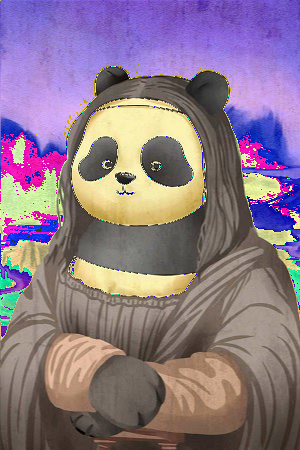

In [10]:
import IPython.display as display
from PIL import Image
image_path = poly_image_encryption('Pandas.jpg', 3)
display.display(Image.open(image_path))

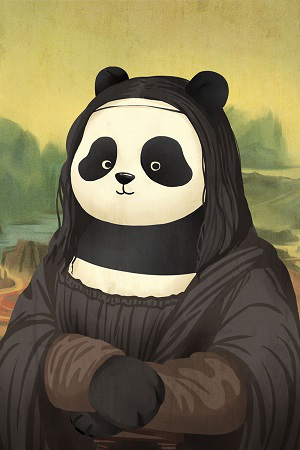

In [11]:
image_path = poly_image_decryption('enc_16_Dec_2022_14_41_28.png', 3)
display.display(Image.open(image_path))

<hr><hr>

# Playfair cipher
## Text

In [62]:
# Function to convert the string to lowercase
def toLowerCase(text):
    return text.lower()


# Function to remove all spaces in a string
def removeSpaces(text):
    newText = ""
    for i in text:
        if i == " ":
            continue
        else:
            newText = newText + i
    return newText


# Function to group 2 elements of a string as a list element
def Diagraph(text):
    Diagraph = []
    group = 0
    for i in range(2, len(text), 2):
        Diagraph.append(text[group:i])

        group = i
    Diagraph.append(text[group:])
    return Diagraph



# Function to fill a letter in a string element
# If 2 letters in the same string matches
def FillerLetter(text):
    k = len(text)
    if k % 2 == 0:
        for i in range(0, k, 2):
            if text[i] == text[i+1]:
                new_word = text[0:i+1] + str('x') + text[i+1:]
                new_word = FillerLetter(new_word)
                break
            else:
                new_word = text
    else:
        for i in range(0, k-1, 2):
            if text[i] == text[i+1]:
                new_word = text[0:i+1] + str('x') + text[i+1:]
                new_word = FillerLetter(new_word)
                break
            else:
                new_word = text
    return new_word


list1 = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'k', 'l', 'm',
        'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']



# Function to generate the 5x5 key square matrix
def generateKeyTable(word, list1):
    key_letters = []
    for i in word:
        if i not in key_letters:
            key_letters.append(i)

    compElements = []
    for i in key_letters:
        if i not in compElements:
            compElements.append(i)
    for i in list1:
        if i not in compElements:
            compElements.append(i)

    matrix = []
    while compElements != []:
        matrix.append(compElements[:5])
        compElements = compElements[5:]

    return matrix


def search(mat, element):
    for i in range(5):
        for j in range(5):
            if(mat[i][j] == element):
                return i, j


def encrypt_RowRule(matr, e1r, e1c, e2r, e2c):
    char1 = ''
    if e1c == 4:
        char1 = matr[e1r][0]
    else:
        char1 = matr[e1r][e1c+1]

    char2 = ''
    if e2c == 4:
        char2 = matr[e2r][0]
    else:
        char2 = matr[e2r][e2c+1]

    return char1, char2


def encrypt_ColumnRule(matr, e1r, e1c, e2r, e2c):
    char1 = ''
    if e1r == 4:
        char1 = matr[0][e1c]
    else:
        char1 = matr[e1r+1][e1c]

    char2 = ''
    if e2r == 4:
        char2 = matr[0][e2c]
    else:
        char2 = matr[e2r+1][e2c]

    return char1, char2


def encrypt_RectangleRule(matr, e1r, e1c, e2r, e2c):
    char1 = ''
    char1 = matr[e1r][e2c]
    char2 = ''
    char2 = matr[e2r][e1c]

    return char1, char2


def encryptByPlayfairCipher(Matrix, plainList):
    CipherText = []
    for i in range(0, len(plainList)):
        c1 = 0
        c2 = 0
        ele1_x, ele1_y = search(Matrix, plainList[i][0])
        ele2_x, ele2_y = search(Matrix, plainList[i][1])

        if ele1_x == ele2_x:
            c1, c2 = encrypt_RowRule(Matrix, ele1_x, ele1_y, ele2_x, ele2_y)
            # Get 2 letter cipherText
        elif ele1_y == ele2_y:
            c1, c2 = encrypt_ColumnRule(Matrix, ele1_x, ele1_y, ele2_x, ele2_y)
        else:
            c1, c2 = encrypt_RectangleRule(
                Matrix, ele1_x, ele1_y, ele2_x, ele2_y)

        cipher = c1 + c2
        CipherText.append(cipher)
    return CipherText

In [63]:
text_Plain = 'test this code'
text_Plain = removeSpaces(toLowerCase(text_Plain))
PlainTextList = Diagraph(FillerLetter(text_Plain))
if len(PlainTextList[-1]) != 2:
    PlainTextList[-1] = PlainTextList[-1]+'z'

key = "rawan"
print("Key text:", key)
key = toLowerCase(key)
Matrix = generateKeyTable(key, list1)

print("Plain Text:", text_Plain)
CipherList = encryptByPlayfairCipher(Matrix, PlainTextList)

CipherText = ""
for i in CipherList:
    CipherText += i
print("CipherText:", CipherText)

Key text: rawan
Plain Text: testthiscode
CipherText: qgtoomlphuef
